## Weather Dataset:

In [44]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import statistics

### Reading Weather data 2019
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [45]:
path = 'data/Weather/TORINO_GIARDINI_REALI_giornalieri_2019.csv'
to_gr_weather_data_2019 = pd.read_csv(path,  sep=';')
to_gr_weather_data_2019["Data"] = pd.to_datetime(to_gr_weather_data_2019["Data"], format='%d/%m/%Y') 
#removing unamed column
to_gr_weather_data_2019 = to_gr_weather_data_2019.loc[:, ~to_gr_weather_data_2019.columns.str.contains('^Unnamed')]
#Removing empty column
to_gr_weather_data_2019.dropna(how='all', axis=1, inplace=True)
to_gr_weather_data_2019

,Data,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Neve Fresca ( cm ),Neve al Suolo ( cm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Radiazione totale ( MJ/mq )
0,2019-01-01,0.0,0.0,0,0,2.5,9.0,-1.2,89,100,62,4.3
1,2019-01-02,0.2,0.2,0,0,2.5,11.3,-1.9,77,100,41,4.9
2,2019-01-03,0.0,0.0,0,0,1.0,10.5,-4.2,62,87,29,4.1
3,2019-01-04,NaN,NaN,0,0,1.0,6.3,-2.3,64,80,30,4.7
4,2019-01-05,0.0,0.0,0,0,2.4,8.5,-2.6,63,84,36,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,0.0,0.0,0,0,4.3,9.4,0.5,76,95,51,4.2
361,2019-12-28,0.0,0.0,0,0,3.2,9.2,-0.3,88,99,58,4.3
362,2019-12-29,0.0,0.0,0,0,3.4,7.9,0.4,89,99,65,3.4
363,2019-12-30,0.0,0.0,0,0,2.6,4.4,0.6,94,99,81,NaN


### Small multiples

In [46]:
def draw_small_multiple(dataframe):
    columns = [c for c in list(dataframe.columns) if c != 'Data']
    
    fig,ax=plt.subplots(nrows=len(columns),ncols=1, figsize=(30,60))

    num = 0
    for c in columns: 
        
        ax[num].bar(dataframe['Data'],dataframe[c])
        ax[num].set_ylabel(c.split("(",1)[1].split(" )",1)[0])    
        ax[num].set_title(c, fontdict= { 'fontsize': 16, 'fontweight':'bold'})

        # Set the locator
        locator = mdates.MonthLocator()  # every month
        # Specify the format - %b gives us Jan, Feb...
        fmt = mdates.DateFormatter('%b')
        X = ax[num].xaxis
        X.set_major_locator(locator)
        # Specify formatter
        X.set_major_formatter(fmt)
        ax[num].grid(True)
        num+=1

    #ax[num-1].set_xlabel("Days")    
        
    sns.despine()
    # If you don't do tight_layout() you'll have weird overlaps
    plt.tight_layout()
    plt.show()

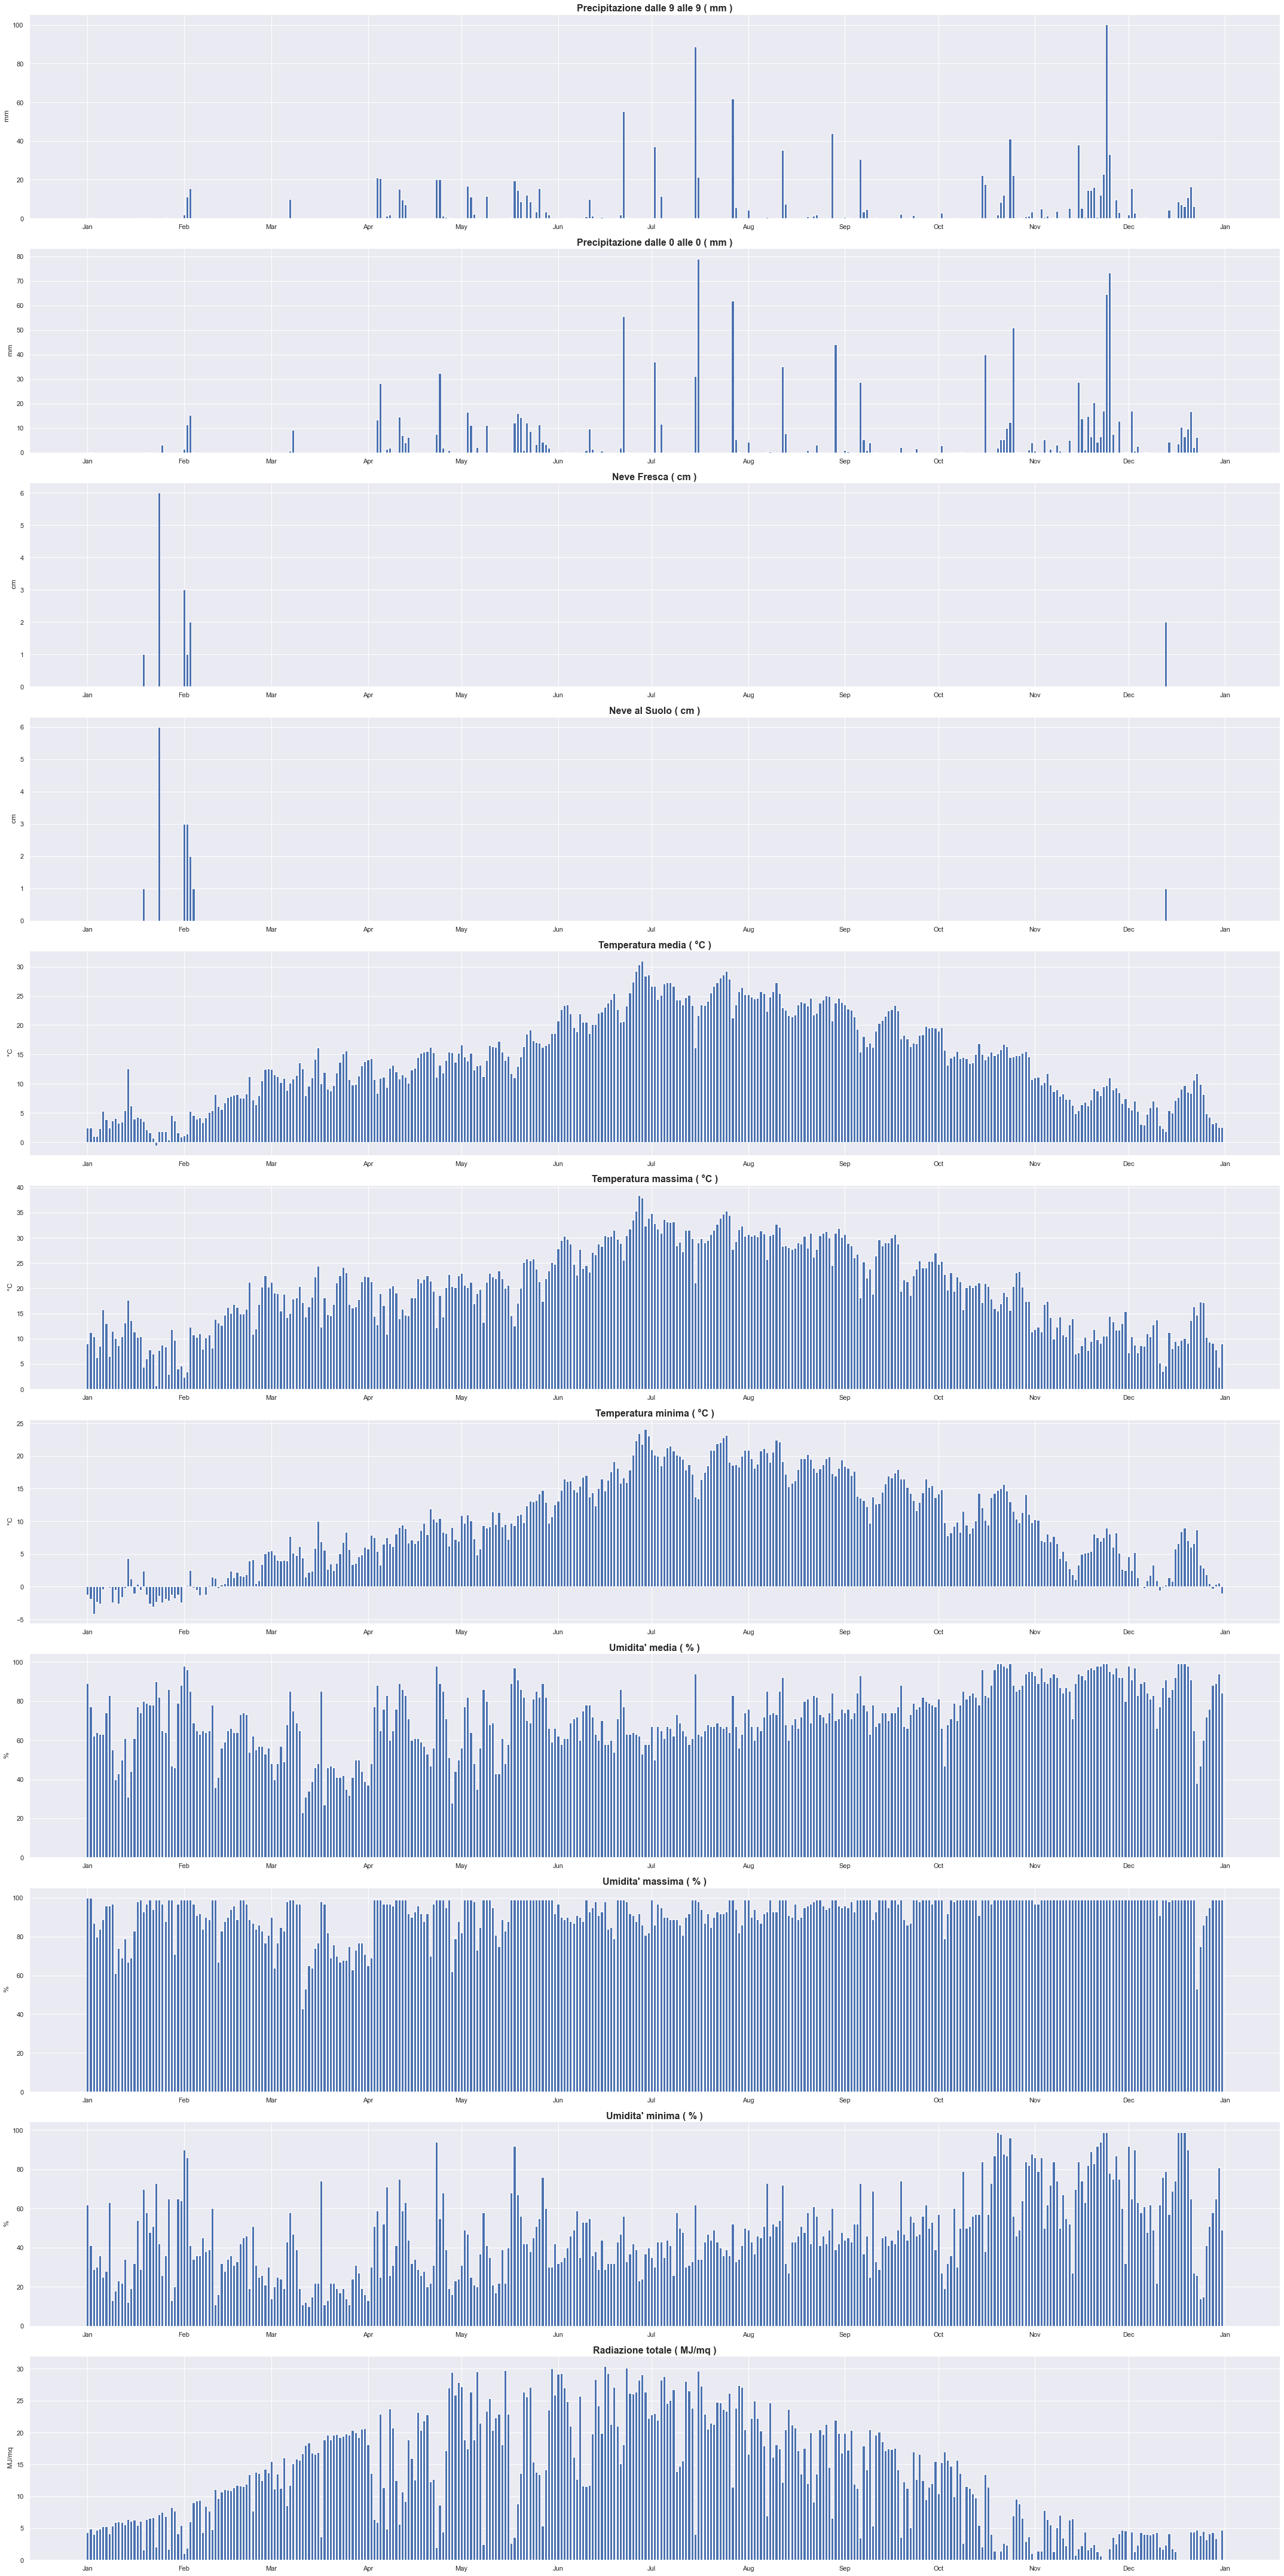

In [47]:
draw_small_multiple(to_gr_weather_data_2019)

### Reading Weather data 2020
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [48]:
path = 'data/Weather/TORINO_GIARDINI_REALI_giornalieri_2020.csv'
to_gr_weather_data_2020 = pd.read_csv(path,  sep=';')
to_gr_weather_data_2020["Data"] = pd.to_datetime(to_gr_weather_data_2020["Data"], format='%d/%m/%Y') 
#removing unamed column
to_gr_weather_data_2020 = to_gr_weather_data_2020.loc[:, ~to_gr_weather_data_2020.columns.str.contains('^Unnamed')]
#Removing empty column
to_gr_weather_data_2020.dropna(how='all', axis=1, inplace=True)
to_gr_weather_data_2020

,Data,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Neve Fresca ( cm ),Neve al Suolo ( cm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Radiazione totale ( MJ/mq )
0,2020-01-01,0.2,0.2,0,0,4.0,11.3,-0.2,82,99,48.0,4.6
1,2020-01-02,0.0,0.0,0,0,3.6,10.1,-0.4,82,99,50.0,4.6
2,2020-01-03,0.2,0.2,0,0,3.6,7.7,1.2,86,99,62.0,2.5
3,2020-01-04,0.0,0.0,0,0,5.5,12.8,0.4,73,99,41.0,5.3
4,2020-01-05,0.0,0.0,0,0,5.1,11.8,1.6,76,97,46.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,0.0,0.0,0,0,0.4,3.4,-2.6,82,93,66.0,3.0
362,2020-12-28,0.0,0.0,4,4,0.5,3.1,-1.9,91,100,75.0,2.4
363,2020-12-29,NaN,3.6,2,3,0.0,5.3,-3.6,92,100,64.0,3.3
364,2020-12-30,0.0,0.0,0,0,2.6,7.5,-1.1,81,100,54.0,4.0


### Small multiples

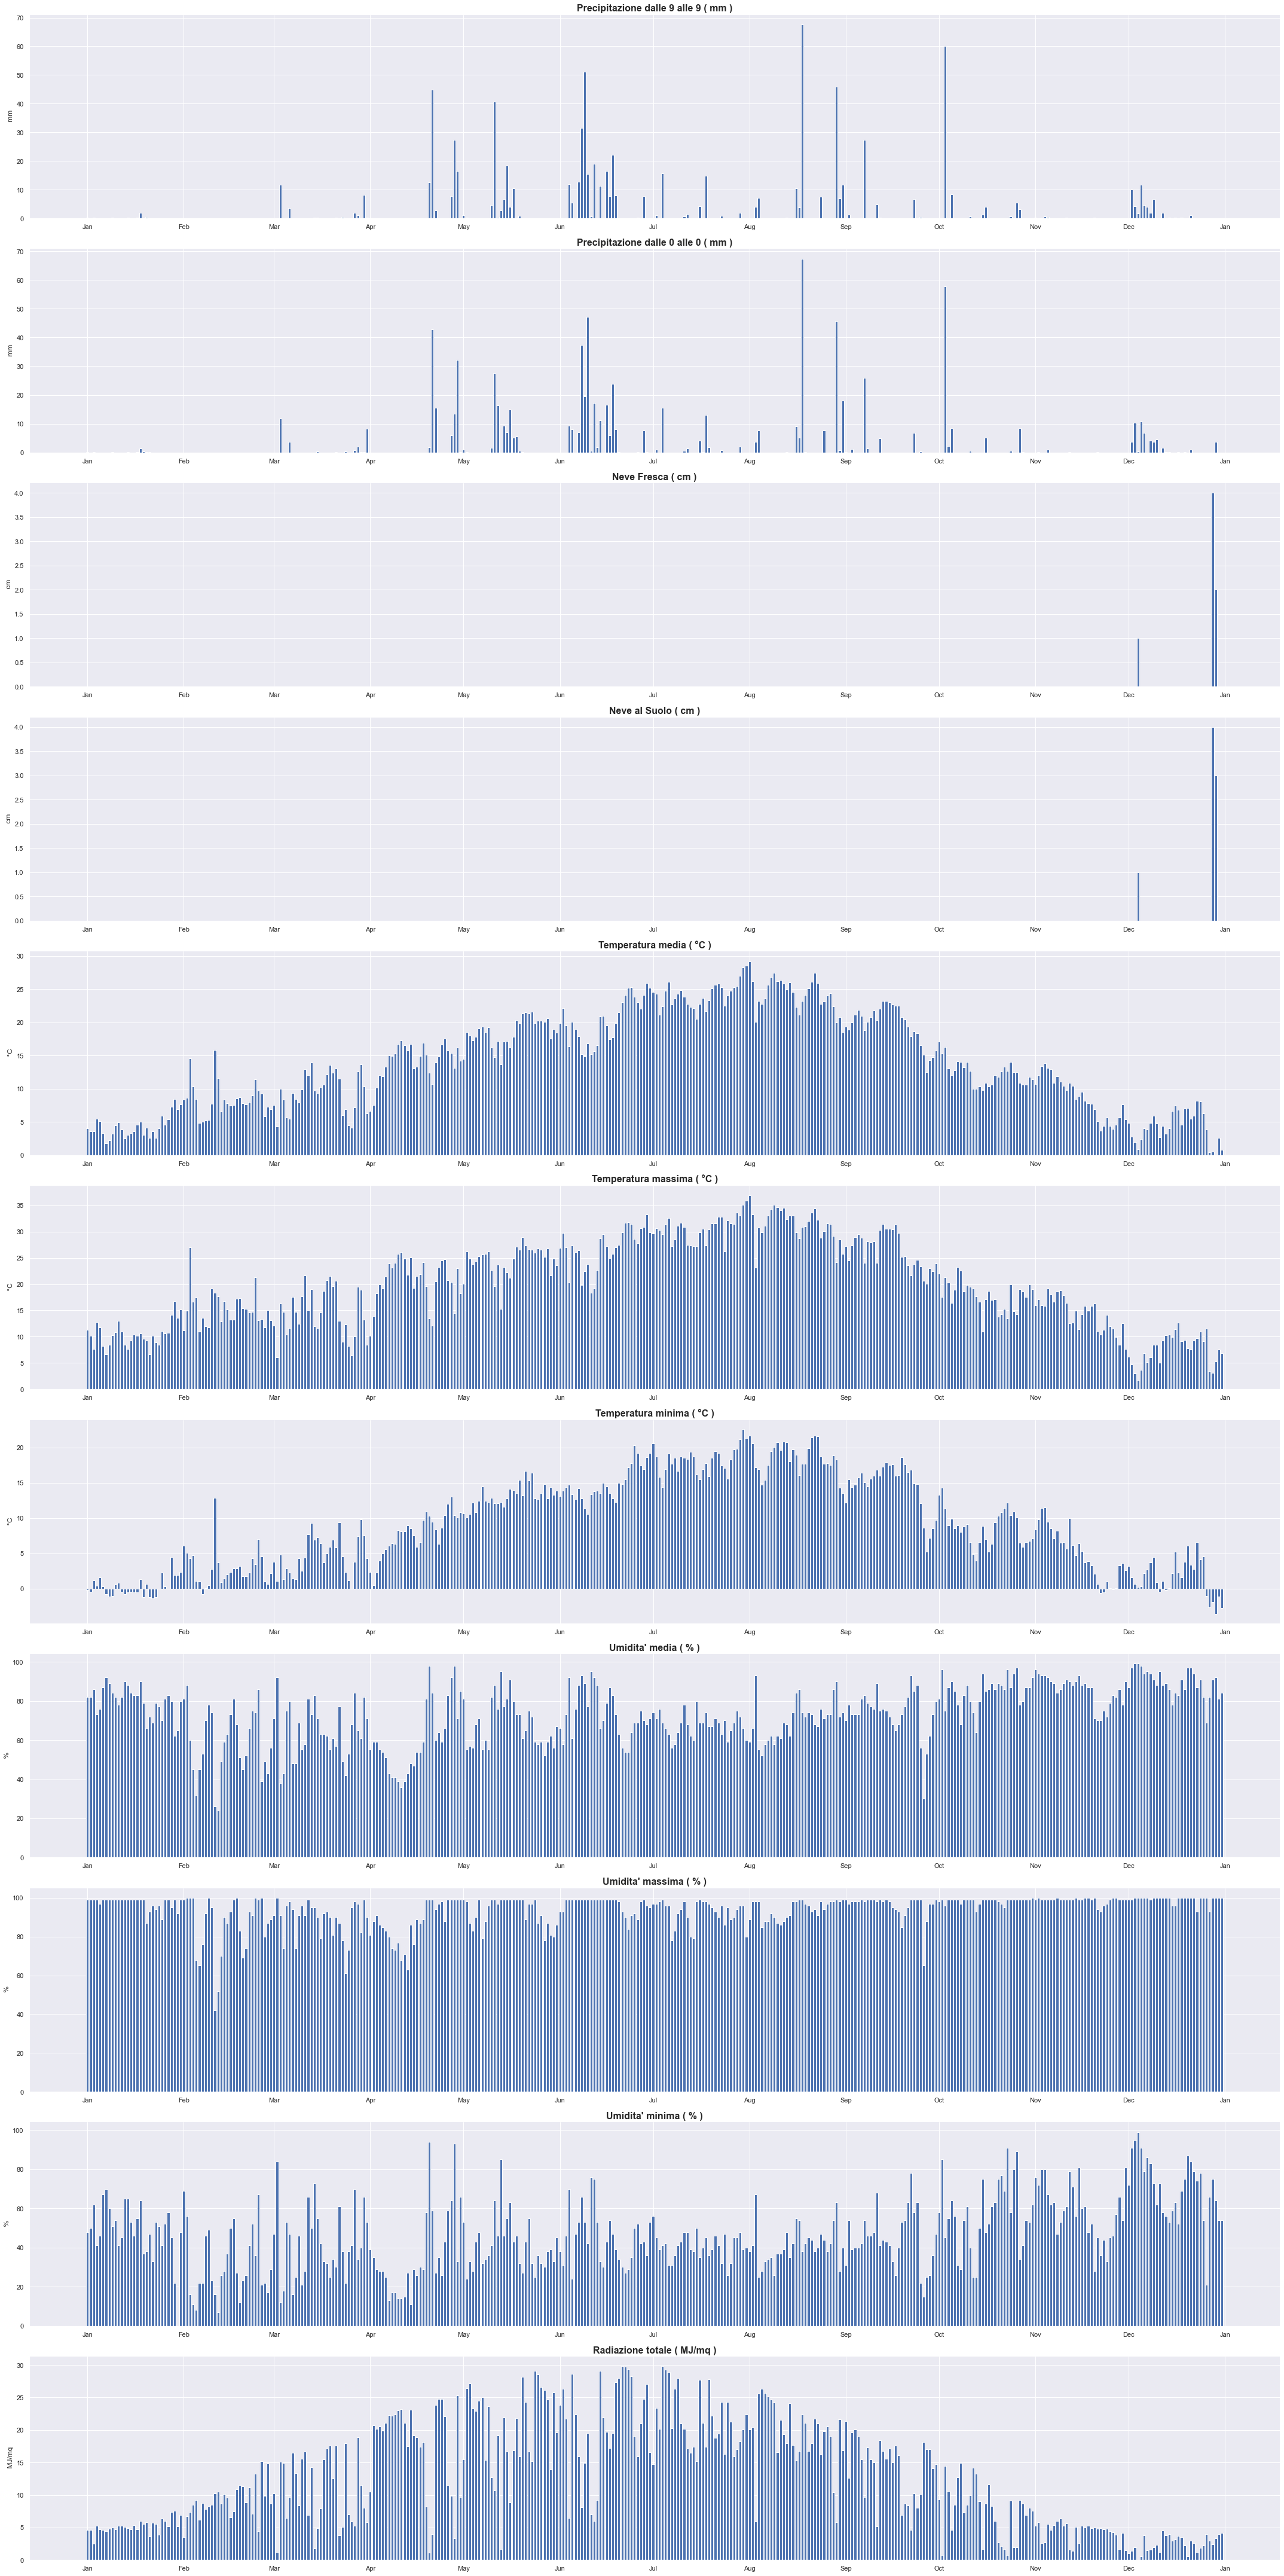

In [49]:
draw_small_multiple(to_gr_weather_data_2020)

### 2019-2020 Comparison

In [50]:
def read_ARPA_csv(path):
    dataFrame = pd.read_csv(path, sep=';',dtype={'Data': str},index_col=False ) 

    #merge date and hours and parsing
    dataFrame["Data"] = dataFrame["Data"]
    dataFrame["Data"] = pd.to_datetime(dataFrame["Data"]) 
    #removing unamed column
    dataFrame = dataFrame.loc[:, ~dataFrame.columns.str.contains('^Unnamed')]
    #Removing empty column
    dataFrame.dropna(how='all', axis=1, inplace=True)
    
    return dataFrame

In [51]:
to_giardini_reali_2019 = read_ARPA_csv('data/Weather/TORINO_GIARDINI_REALI_giornalieri_2019.csv')[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']]
to_giardini_reali_2020 = read_ARPA_csv('data/Weather/TORINO_GIARDINI_REALI_giornalieri_2020.csv')[['Data', 'Precipitazione dalle 0 alle 0 ( mm )']]

#rename value column
to_giardini_reali_2019.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitazione dalle 0 alle 0 ( mm ) - 2019'}, inplace = True)
to_giardini_reali_2020.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitazione dalle 0 alle 0 ( mm ) - 2020'}, inplace = True)
#group by week
to_giardini_reali_2019= to_giardini_reali_2019.resample('W', on='Data').mean()
to_giardini_reali_2020 = to_giardini_reali_2020.resample('W', on='Data').mean()
# #creating grouped data
to_giardini_reali_2019['Data rilevamento']=to_giardini_reali_2019.index.get_level_values('Data').strftime('%U/%m')
to_giardini_reali_2020['Data rilevamento']=to_giardini_reali_2020.index.get_level_values('Data').strftime('%U/%m')
#merge data
merged_giardini_reali = pd.merge(to_giardini_reali_2019 ,to_giardini_reali_2020 ,on=['Data rilevamento','Data rilevamento'])
merged_giardini_reali.set_index("Data rilevamento",inplace=True)
merged_giardini_reali= merged_giardini_reali.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm ) - 2019':'Daily Precipitation 2019 ( mm )','Precipitazione dalle 0 alle 0 ( mm ) - 2020':'Daily Precipitation 2020 ( mm )'})

Text(0.5, 1.0, 'Precipitation comparison 2019/2020 Turin ( mm )')

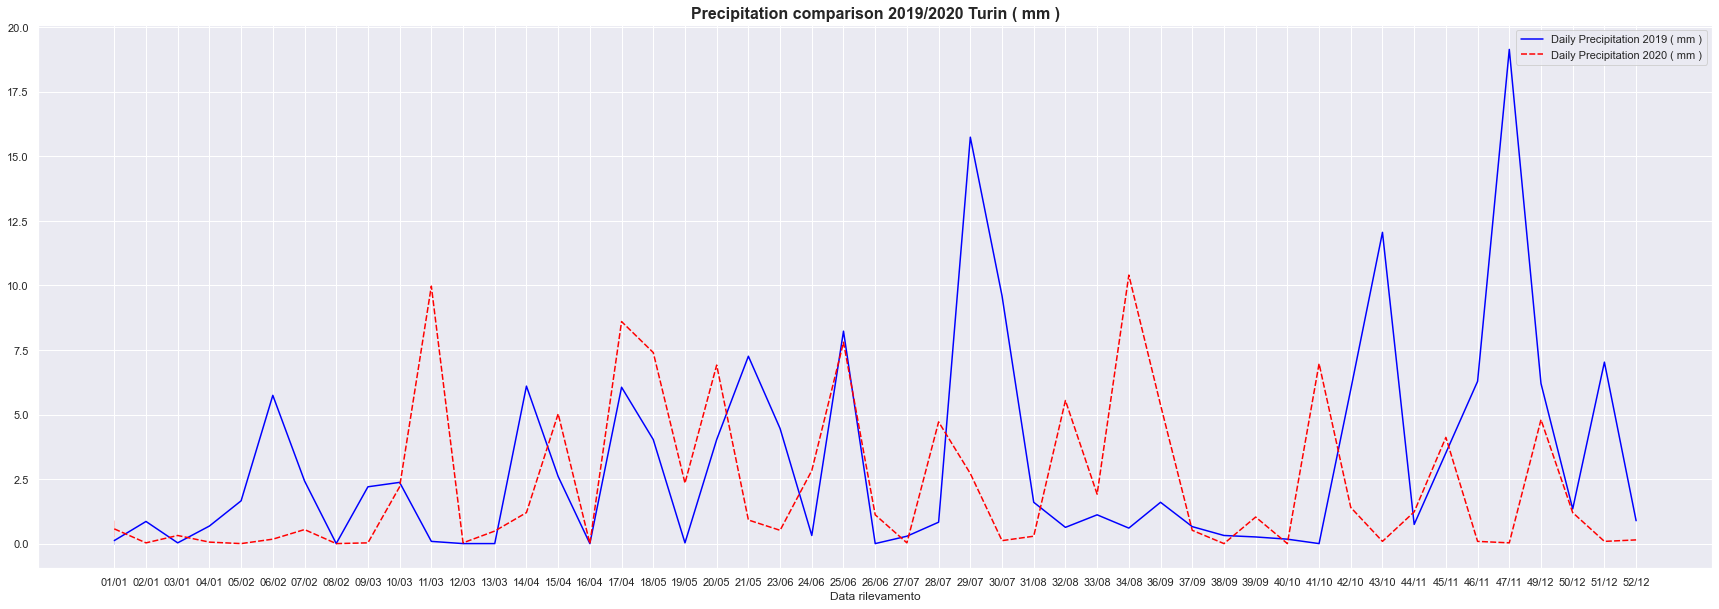

In [52]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_giardini_reali, palette=palette)
plt.title("Precipitation comparison 2019/2020 Turin ( mm )",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

In [53]:
def get_change_from_2012_2019(year):
    yearly_data = []

    #getting all the dataset
    for x in range(2012, 2020):
        data = read_ARPA_csv('data/Weather/TORINO_GIARDINI_REALI_giornalieri_' + str(x) + '.csv')[['Data','Precipitazione dalle 0 alle 0 ( mm )','Neve Fresca ( cm )',"Temperatura media ( °C )","Umidita' media ( % )"]]
        #take only the day of the year
        data['Data']= data['Data'].dt.dayofyear
        yearly_data.append(data)

    #create daily baseline
    avg_daily_baseline=pd.concat([yearly_data[0],yearly_data[1],yearly_data[2],yearly_data[3],yearly_data[4],yearly_data[5],yearly_data[6],yearly_data[7]]).groupby('Data', as_index=True).mean()
    avg_daily_baseline.reset_index(inplace = True)

    #Unpivot a DataFrame from wide to long format
    avg_daily_baseline = avg_daily_baseline.melt(id_vars="Data", value_vars=['Precipitazione dalle 0 alle 0 ( mm )','Neve Fresca ( cm )','Temperatura media ( °C )',"Umidita' media ( % )"],
        var_name='type', value_name='value', ignore_index=True)
    avg_daily_baseline.dropna(inplace=True)
    avg_daily_baseline= avg_daily_baseline[avg_daily_baseline['value'] != 0]
    
    #get 2020 data
    data_2020 = read_ARPA_csv('data/Weather/TORINO_GIARDINI_REALI_giornalieri_'+ year +'.csv')[['Data','Precipitazione dalle 0 alle 0 ( mm )','Neve Fresca ( cm )',"Temperatura media ( °C )","Umidita' media ( % )"]]
    data_2020['Giorno']= data_2020['Data'].dt.dayofyear

    #Unpivot a DataFrame from wide to long format
    data_2020 = data_2020.melt(id_vars=["Data", "Giorno"], value_vars=['Precipitazione dalle 0 alle 0 ( mm )','Neve Fresca ( cm )','Temperatura media ( °C )',"Umidita' media ( % )"],
        var_name='type', value_name='value', ignore_index=True)

    data_2020= data_2020[data_2020['value'] != 0]

    data_2020.set_index('Giorno')
    avg_daily_baseline.set_index('Data')

    #calculate percentage deviation
    #print(data_2020)
    return_data = data_2020
    return_data['value'] = ((data_2020['value']-avg_daily_baseline['value'])/avg_daily_baseline['value'])*100

    #resetting index
    return_data.set_index('Data')

    #remove nan column and useless column
    # return_data.dropna(inplace=True)
    return_data= return_data[return_data['value'].between(-100, 100)]
    del return_data['Giorno']

    return_data = return_data.pivot(index='Data', columns='type', values='value')
    return_data.reset_index(inplace=True)

    #rename column
    return_data= return_data.rename(columns = {'Precipitazione dalle 0 alle 0 ( mm )':'Precipitation ( % )','Neve Fresca ( cm )':'Snow ( % )','Temperatura media ( °C )':'Average Temperature ( % )',"Umidita' media ( % )":'Average Humidity ( % )'})

    return return_data

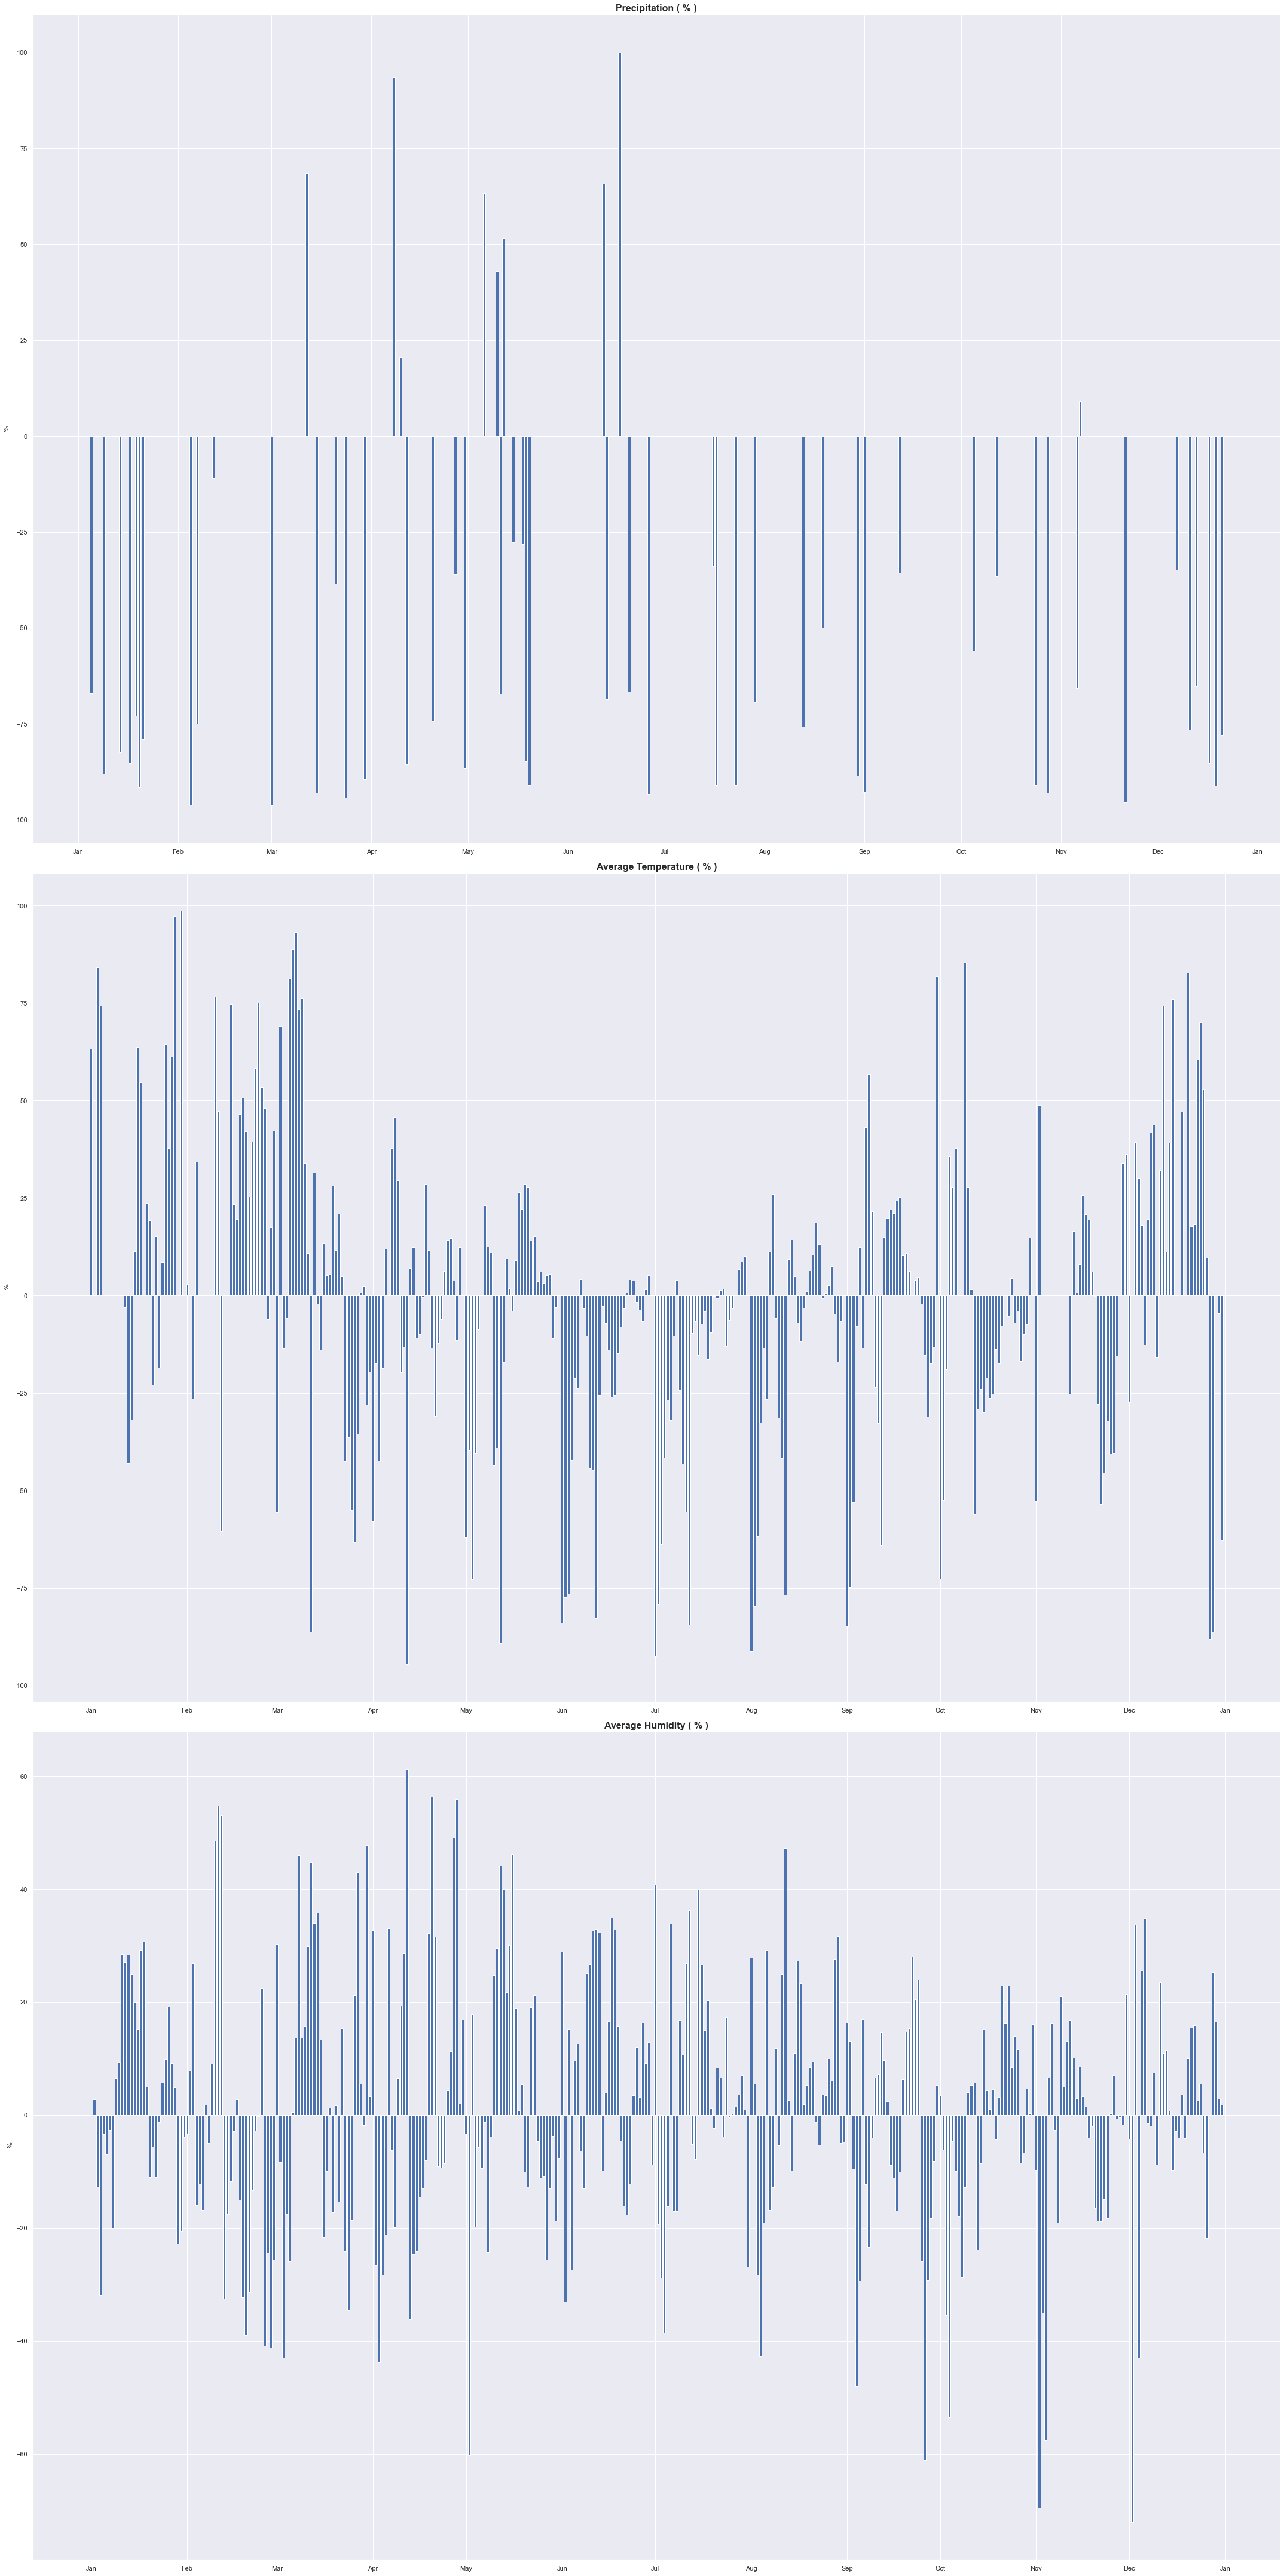

In [54]:
draw_small_multiple(get_change_from_2012_2019('2020'))